In [18]:
import sys
import gym 
import numpy as np
import math 
from collections import defaultdict, deque
from matplotlib import pyplot as plt
import random
%matplotlib inline

import check_test 
from plot_utils import plot_values

In [19]:
env =  gym.make('CliffWalking-v0')

In [20]:
print(env.action_space)
print(env.observation_space)

Discrete(4)
Discrete(48)


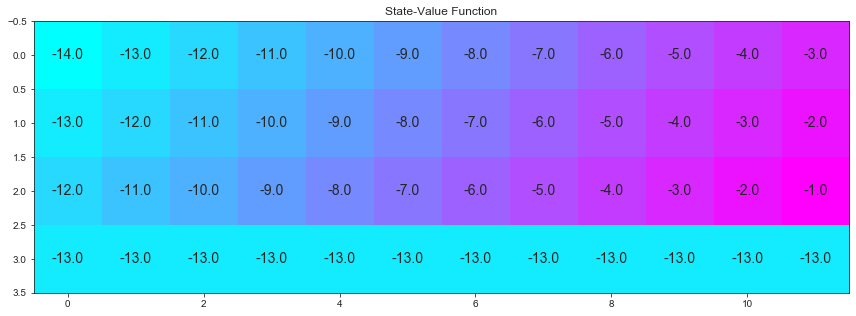

In [21]:
V_opt = np.zeros((4, 12))
V_opt[0][0:13] = -np.arange(3, 15)[::-1]
V_opt[1][0:13] = -np.arange(3, 15)[::-1]+1
V_opt[2][0:13] = -np.arange(3, 15)[::-1]+2
V_opt[3][0:13] = -13

plot_values(V_opt)

In [22]:
def update_q_sarsa(alpha, gamma, Q, s, a, r, n_s = None, n_a = None):
    curr = Q[s][a]
    
    Qsa_nxt = Q[n_s][n_a] if n_s is not None else 0
    
    target = r + (gamma * Qsa_nxt)
    
    new_val = curr + (alpha*(target  - curr))
    return new_val

def epsilon_greedy(Q, s, nA, eps):
    if random.random() > eps:
        return np.argmax(Q[s])
    else:
        return random.choice(np.arange(env.action_space.n))

In [23]:
def sarsa(env, num_ep, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tm_score = deque(maxlen=plot_every)
    avg_score = deque(maxlen=num_ep)
    
    for i in range(1, num_ep+1):
        if i%100 == 0:
            print('\rEpisodes {}/{}'.format(i, num_ep), end='')
            sys.stdout.flush()
        score = 0
        s = env.reset()
        
        eps = 1.0/i
        
        a = epsilon_greedy(Q, s, nA, eps)
        
        while True:
            n_s, r, done, info =env.step(a)
            
            score += r
            
            if not done:
                n_a = epsilon_greedy(Q, n_s, nA, eps)
                Q[s][a] = update_q_sarsa(alpha, gamma, Q, s, a, r, n_s, n_a)
                
                s = n_s
                a = n_a
                
            if done:
                Q[s][a] = update_q_sarsa(alpha, gamma, Q, s, a,r)
                tm_score.append(np.mean(score))
                break
                
        if i%plot_every ==0:
            avg_score.append(np.mean(tm_score))
            
    
    plt.plot(np.linspace(0, num_ep, len(avg_score), endpoint= False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over next %d Episode)'%plot_every)
    plt.show()
    
    print(('Best Average Reward over %d Episodes: '%plot_every), np.argmax(avg_score))
    return Q
                

Episodes 5000/5000

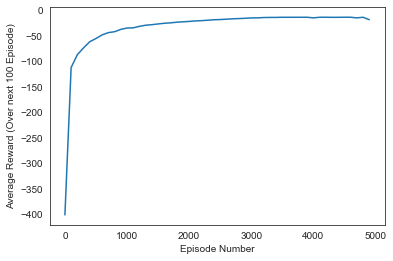

Best Average Reward over 100 Episodes:  42


**<span style="color: green;">PASSED</span>**

[[ 2  3  1  1  3  3  1  1  3  3  0  3]
 [ 1  0  1  1  3  1  1  2  1  1  1  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]]


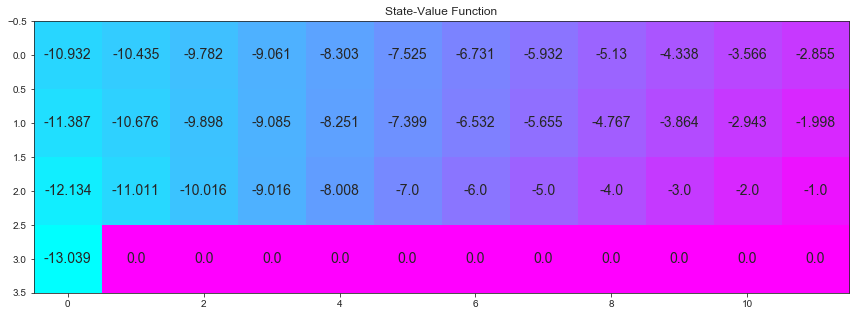

In [31]:
Q_sarsa = sarsa(env, 5000, .01)

policy_sarsa = np.array([np.argmax(Q_sarsa[key]) if key in Q_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_sarsa)
print(policy_sarsa)

v_sarsa = ([np.max(Q_sarsa[key]) if key in Q_sarsa else 0 for key in np.arange(48)])
plot_values(v_sarsa)

In [32]:
def update_Q_sarsamax(alpha, gamma, Q, s, a, r, n_s=None):
    curr = Q[s][a]
    Qsarsa_next = np.max(Q[n_s]) if n_s is not None else 0
    target = r + (gamma*Qsarsa_next)
    
    new_val = curr + (alpha*(target - curr))
    return new_val

In [33]:
def q_learning(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_score = deque(maxlen=plot_every)
    avg_score = deque(maxlen=num_episodes)
    
    for i in range(1, num_episodes+1):
        if i%100 ==0:
            print('\rEpisodes {}/{}'.format(i, num_episodes), end='')
            sys.stdout.flush()
        
        score = 0 
        s = env.reset()
        eps = 1.0 / i
        
        while True:
            a = epsilon_greedy(Q, s, nA, eps)
            n_s, r, done, info = env.step(a)
            
            score += n_s
            
            Q[s][a] = update_Q_sarsamax(alpha, gamma, Q, s, a, r, n_s)
            s = n_s
            
            if done:
                tmp_score.append(score)
                break
        
        if (i%plot_every == 0):
            avg_score.append(np.mean(tmp_score))
            
    plt.plot(np.linspace(0, num_episodes, len(avg_score), endpoint= False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over next %d Episode)'%plot_every)
    plt.show()
    
    print(('Best Average Reward over %d Episodes: '%plot_every), np.argmax(avg_score))
    return Q   
            
            
        

Episodes 5000/5000

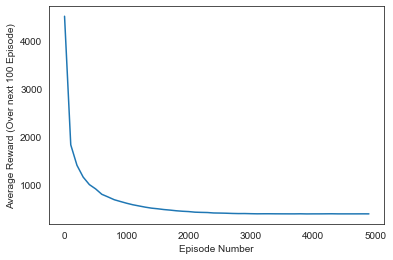

Best Average Reward over 100 Episodes:  0


**<span style="color: green;">PASSED</span>**

[[ 0  1  1  1  3  0  1  1  1  3  1  0]
 [ 1  2  1  1  1  0  1  1  1  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


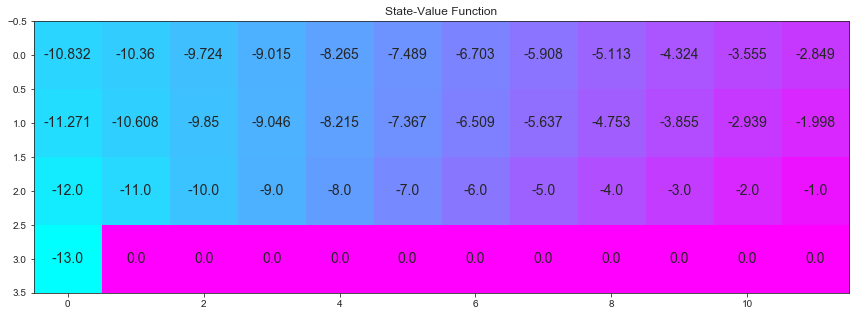

In [34]:
Q_learning = q_learning(env, 5000, .01)

policy_qleaning = np.array([np.argmax(Q_learning[key]) if key in Q_learning else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check', policy_qleaning)
print(policy_qleaning)

v_qleaning = ([np.max(Q_learning[key]) if key in Q_learning else 0 for key in np.arange(48)])
plot_values(v_qleaning)

In [64]:
def update_qlearning_expected_sarsa(alpha, gamma, nA, eps, Q, s, a, r, n_s=None):
    
    curr = Q[s][a]
    pi_s = np.ones(nA) * eps / nA
    pi_s[np.argmax(Q[n_s])] = 1 - eps+(eps/nA)
    Qsa_n = np.dot(Q[n_s], pi_s)
    
    target = r + (gamma*Qsa_n)
    new_val = curr + (alpha*(target - curr))
    return new_val

In [65]:
def expected_sarsa(env, num_episodes, alpha, gamma=1.0, plot_every=100):
    nA = env.action_space.n
    Q = defaultdict(lambda: np.zeros(nA))
    
    tmp_score = deque(maxlen=plot_every)
    avg_score = deque(maxlen=num_episodes)
    
    for i in range(1, num_episodes+1):
        if i%100 ==0:
            print('\rEpisodes {}/{}'.format(i, num_episodes), end='')
            sys.stdout.flush()
        
        score = 0 
        s = env.reset()
        eps = 1.0 / i
        
        while True:
            a = epsilon_greedy(Q, s, nA, eps)
            n_s, r, done, info = env.step(a)
            
            score += n_s
            
            Q[s][a] = update_qlearning_expected_sarsa(alpha, gamma, nA,eps, Q, s, a, r, n_s)
            s = n_s
            
            if done:
                tmp_score.append(score)
                break
        
        if (i%plot_every == 0):
            avg_score.append(np.mean(tmp_score))
            
    plt.plot(np.linspace(0, num_episodes, len(avg_score), endpoint= False), np.asarray(avg_score))
    plt.xlabel('Episode Number')
    plt.ylabel('Average Reward (Over next %d Episode)'%plot_every)
    plt.show()
    
    print(('Best Average Reward over %d Episodes: '%plot_every), np.argmax(avg_score))
    return Q   
            
            
        

Episodes 5000/5000

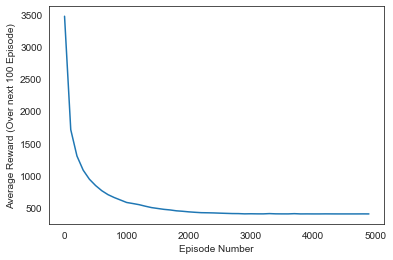

Best Average Reward over 100 Episodes:  0


**<span style="color: green;">PASSED</span>**

[[ 0  1  1  1  1  2  1  1  1  1  2  0]
 [ 1  1  1  1  1  1  1  1  1  1  2  2]
 [ 1  1  1  1  1  1  1  1  1  1  1  2]
 [ 0 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1  0]]


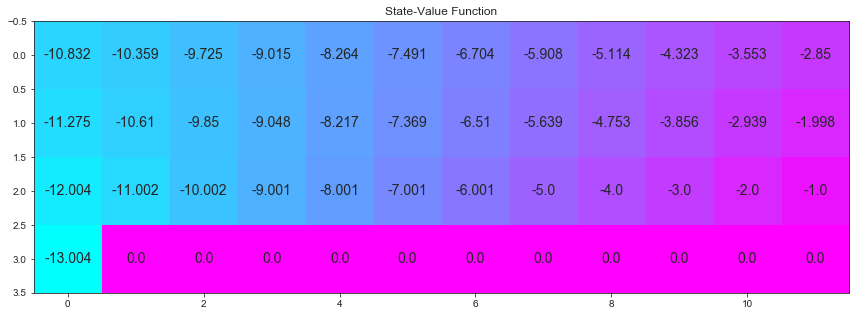

In [66]:
expected_sarsa = expected_sarsa(env, 5000, 0.01)

policy_expected_sarsa = np.array([np.argmax(expected_sarsa[key]) if key in expected_sarsa else -1 for key in np.arange(48)]).reshape(4,12)
check_test.run_check('td_control_check',policy_expected_sarsa)
print(policy_expected_sarsa)

v_expected_sarsa = ([np.max(expected_sarsa[key]) if key in expected_sarsa else 0 for key in np.arange(48)])
plot_values(v_expected_sarsa)